In [1]:
import numpy as np
from EDAspy.optimization import EGNA
import matplotlib.pyplot as plt

from utils import oned_well

In [2]:
# Definición de la función de optimización basada en referencia: Direct solution of Schrödinger equation by genetic algorithm:
# test cases
###############################
# def compute_Z(x: Union[np.array, list]) -> float:
#     # Energy_lower bound
#     E = 0
#     # Well lenght
#     L = 5
#     n = len(x)
#     ExpE = 0
#     j = 0
#     cons = 1 * 10 ** (-6)
#     if (x[0] < -0.1 or x[0] > 0.1) or (x[n - 1] < -0.1 or x[n - 1] > 0.1):
#         F = np.infty
#         return F

#     else:
#         for i in range(n):
#             if i == 0:
#                 ExpE = ExpE - 0.5 * ((n - 1) / L) * (
#                     x[i] * (x[i] + x[i + 2] - 2 * x[i + 1])
#                 )
#                 j = j + x[i] ** 2 * (L / (n - 1))

#             elif i == n - 1:
#                 ExpE = ExpE - 0.5 * ((n - 1) / L) * (
#                     x[i] * (x[i] + x[i - 2] - 2 * x[i - 1])
#                 )
#                 j = j + x[i] ** 2 * (L / (n - 1))

#             else:
#                 ExpE = ExpE - 0.5 * ((n - 1) / L) * (
#                     x[i] * (x[i - 1] + x[i + 1] - 2 * x[i])
#                 )
#                 j = j + x[i] ** 2 * (L / (n - 1))

#     Z = (ExpE / j - E) ** 2
#     F = -1 * np.exp(-cons * Z)  # con signo menos global para minimizar
#     return Z

Prueba de código con solución analítica

In [3]:
x = (2 / 5) ** 0.5 * np.sin(np.pi * np.linspace(0, 5, 100) * 1 / 5)
n = len(x)
L = 5
m = 1
ExpE = 0
j = 0
E = 0.19737552409610196
cons = 1 * 10 ** (-12)
for i in range(n):
    if i == 0:
        ExpE = ExpE - 0.5 * ((n - 1) / L) * x[i] * (x[i] + x[i + 2] - 2 * x[i + 1]) / m
        j = j + x[i] ** 2 * (L / (n - 1))

    elif i == n - 1:
        ExpE = ExpE - 0.5 * ((n - 1) / L) * x[i] * (x[i] + x[i - 2] - 2 * x[i - 1]) / m
        j = j + x[i] ** 2 * (L / (n - 1))

    else:
        ExpE = ExpE - 0.5 * ((n - 1) / L) * x[i] * (x[i - 1] + x[i + 1] - 2 * x[i]) / m
        j = j + x[i] ** 2 * (L / (n - 1))

Z = (ExpE / j - E) ** 2
F = -1 * np.exp(-cons * Z)  # con signo menos global para minimizar

print(ExpE, j, Z, F)

0.19737552409610196 1.0000000000000004 6.933347799794049e-33 -1.0


## Niveles de energía válidos
Hemos fijado $m=\hbar=1 \longrightarrow h = 2\pi$ y la longitud del pozo es $L=5$
De manera que los niveles de energía admisibles pasan a ser:
$$E_n = n²\frac{h²}{8mL²} \longrightarrow E_n = n²\frac{(2\pi)^2}{8L²}$$
Con n=1 tenemos el ground state, de manera que podemos escribir:
$$E_g = E_1 = \frac{h²}{8mL²} \longrightarrow E_n = n²\,E_g $$
Y tenemos: $$E_g = 0.1974$$


In [4]:
L = 5
Eg = (2 * np.pi) ** 2 / (8 * L**2 * 1)
En = []
for i in range(7):
    e = (i + 1) ** 2 * Eg
    En.append(e)
    print(f"E_{i+1} = {e}")

E_1 = 0.19739208802178715
E_2 = 0.7895683520871486
E_3 = 1.7765287921960844
E_4 = 3.1582734083485944
E_5 = 4.934802200544679
E_6 = 7.106115168784338
E_7 = 9.67221231306757


## Discretización función de onda

In [5]:
n_variables = (
    51  # Es el número de elementos con los que se particiona la función de onda
)

In [6]:
print(5 / (n_variables - 1), " es el tamaño del grid")

0.1  es el tamaño del grid


# EDAs

Puesto que buscamos una función continua obligamos a la red Bayesiana a aprender arcos entre los puntos consecutivos. Aunque el algoritmo es capaz de hallar la solución sin necesidad de esto, y no hemos comprobado qué arcos aprendía en el proceso sin white list.

In [7]:
whites = [(str(i), str(i + 1)) for i in range(n_variables - 1)]
whites = [(str(i + 1), str(i)) for i in range(n_variables - 1)]
results_dict = {}
objects = [
    "eda_resultGAtoSE",
    "eda_resultExpE",
    "eda_resultExpExcitated",
    "eda_resultGAtoSEExcitated",
    "eda_resultExpExcitated3",
    "eda_resultGAtoSEExcitated3",
    "eda_resultExpExcitated4",
]

qumda = EGNA(
    size_gen=1500,
    max_iter=500,
    dead_iter=100,
    n_variables=n_variables,
    lower_bound=0,
    upper_bound=2,
    alpha=0.5,
    parallelize=True,
    white_list=whites,
)
results_dict["eda_resultExpE"] = qumda.minimize(
    oned_well.compute_z, output_runtime=True
)

IT:  0 	Best cost:  999999999999
IT:  1 	Best cost:  94131359.2166364
IT:  2 	Best cost:  92422323.81937987
IT:  3 	Best cost:  90088460.130589
IT:  4 	Best cost:  90088460.130589
IT:  5 	Best cost:  380.25047975201073
IT:  6 	Best cost:  380.25047975201073
IT:  7 	Best cost:  380.25047975201073
IT:  8 	Best cost:  380.25047975201073
IT:  9 	Best cost:  380.25047975201073
IT:  10 	Best cost:  380.25047975201073
IT:  11 	Best cost:  341.69075401110246
IT:  12 	Best cost:  341.69075401110246
IT:  13 	Best cost:  341.69075401110246
IT:  14 	Best cost:  341.69075401110246
IT:  15 	Best cost:  341.69075401110246
IT:  16 	Best cost:  341.69075401110246
IT:  17 	Best cost:  341.69075401110246
IT:  18 	Best cost:  341.69075401110246
IT:  19 	Best cost:  336.02184152783
IT:  20 	Best cost:  294.88889804552645
IT:  21 	Best cost:  249.83814227984652
IT:  22 	Best cost:  249.83814227984652
IT:  23 	Best cost:  249.83814227984652
IT:  24 	Best cost:  249.83814227984652
IT:  25 	Best cost:  249.838

### Normalización soluciones
Una vez halladas las soluciones es necesario normalizarlas de manera que se cumpla la condición:
$\int|\Psi(x)|²dx = 1$ sustituyendo la integral por cuadraturas sobre el grid de puntos.

A continuación **solo se normaliza la última solución** para visualizar el plot estático.


In [ ]:
objects = {
    "eda_resultExpE": results_dict["eda_resultExpE"],
    # "eda_resultGAtoSE": results_dict['eda_resultGAtoSE'],
    # "eda_resultGAtoSEMNA": eda_resultGAtoSEMNA,
    # "eda_resultGAtoSPEDA": eda_resultGAtoSPEDA,
    # "eda_resultD_well": eda_resultD_well,
}

# Cálculo de las constantes para normalización soluciones
for element in objects.keys():
    integral = 0
    for i in range(len(objects[element].sel_inds_hist[-1, 0, :-1])):
        integral = integral + (objects[element].sel_inds_hist[-1, 0, :-1][i] ** 2) * (
            5 / (n_variables - 1)
        )

    B = (1 / integral) ** 0.5
    objects[element].sel_inds_hist[-1, 0, :-1] = (
        B * objects[element].sel_inds_hist[-1, 0, :-1]
    )

# integral =0
# for i in range(len(eda_resultGAtoSE.sel_inds_hist[-1,0,:-1])):
# integral = integral + (eda_resultGAtoSE.sel_inds_hist[-1,0,:-1][i]**2)*(5/(n_variables-1))

# B = (1/integral)**0.5

## Valor esperado de Energía de la solución encontrada por la función 1

Una vez que la solución está normalizada el denominador $\lt\Psi|\Psi\gt = 1 $. Habiendo fijado la estimación de la energía $E_l = 0$ el fitness de la solución candidata debería ser simplemente $[\lt \Psi|\hat H|\Psi\gt]^2$ que es el valor esperado de la energía de la solución encontrada elevado al cuadrado.

In [ ]:
print(
    "La energía esperada de la solución encontrada es:",
    results_dict["eda_resultExpE"].sel_inds_hist[-1, 0, -1] ** 0.5,
    "\nEl valor teórico es 0.19739208802178715",
)

La energía esperada de la solución encontrada es: 0.2657792117875291 
El valor teórico es 0.19739208802178715


In [ ]:
# Para (n-1) y con los extremos acortados a la mitad: 0.23598239373218768
# Para (n-1) y con los extremos sin acortar: 0.24469602017418932
# Para n y con los extremos acortados a la mitad: 0.25105418336911456
# Para n y con los extremos sin acortar: 0.2657792117875291

### Definición funciones analíticas
Solo cambia el número n para cada Psi_n por lo que las definimos de forma genérica.

In [ ]:
def Psi_n(n):
    return (2 / 5) ** 0.5 * np.sin(n * np.pi * np.linspace(0, 5, n_variables) / 5)


# Comprobamos que todas las soluciones están normalizadas
for n in [1, 2, 3, 4]:
    int = 0
    for i in range(n_variables):
        int = int + Psi_n(n)[i] ** 2 * (5 / (n_variables - 1))
    assert int == 1.0

AssertionError: 

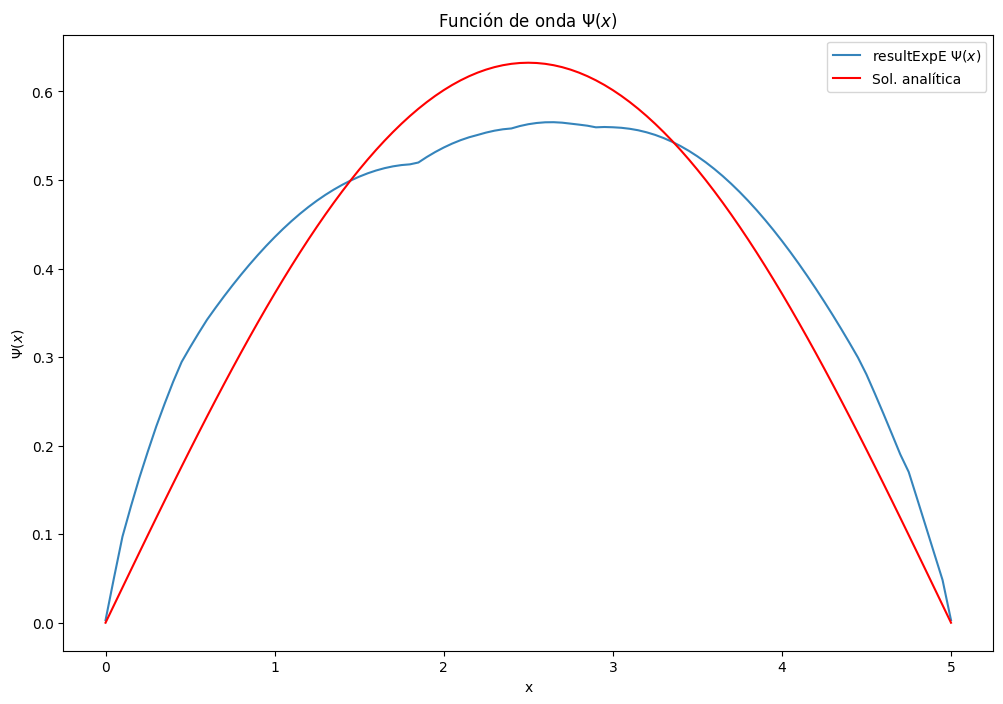

In [ ]:
plt.figure(figsize=(12, 8))
for element in objects.keys():
    plt.plot(
        np.linspace(0, 5, n_variables),
        objects[element].sel_inds_hist[-1, 0, :-1],
        "-",
        label=f'{element.split("da_")[1]} $\Psi(x)$',
        alpha=0.9,
    )

plt.plot(np.linspace(0, 5, n_variables), Psi_n(1), "r-", label="Sol. analítica")
plt.gca().set_title("Función de onda $\Psi(x)$")
plt.xlabel("x")
plt.gca().set_ylabel(r"$\Psi(x)$")
plt.legend()